# Laboratorio 1: Kmeans 

## Objetivo:
- Perfilamiento y entendimiento de los datos
- Usar Kmeans
## Caso :

BiciAlpes quiere  conocer cuáles son los factores que más impactan en los accidentes viales que involucran ciclistas. Para realizar este estudio BiciAlpes han recopilado datos, de fuentes abiertas de la Alcaldía, sobre accidentes en los cuales se han visto involucrados ciclistas.

## 1. Cargar librerías


In [1]:
!pip install pandas-profiling --upgrade
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 
import pandas_profiling

C:\Users\user\AppData\Local\Temp\ipykernel_19076\2285080908.py:12: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


## 2. Cargar datos

In [2]:
dt_biciAlpes = pd.read_csv('./datos/Datos_BiciAlpes.csv',sep=';', encoding = "ISO-8859-1")
dt_biciAlpes.shape

(5338, 15)

## 3. Perfilamiento y entendimiento de los datos

In [3]:
dt_biciAlpes.sample(10)
#10 registros random

,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity,Unnamed: 14
1930,Tarde,1,Fin de semana,1,70.0,1,1,1,2,bike,2,1,1,3,NaN
3886,Mañana,1,Día laboral,6,40.0,1,1,2,2,bike,1,0,1,2,NaN
5284,Tarde,3,Día laboral,6,30.0,4,1,1,1,bike,1,3,1,3,NaN
5047,Mañana,1,Día laboral,2,30.0,1,2,2,1,bike,1,3,1,2,NaN
4114,Noche,1,Fin de semana,6,30.0,6,1,2,2,bike,2,0,1,2,NaN
656,Noche,1,Fin de semana,6,30.0,5,1,1,1,bike,1,0,1,3,NaN
2795,Mañana,1,Día laboral,6,30.0,1,1,1,1,bike,1,9,1,2,NaN
4605,Noche,1,Día laboral,6,20.0,4,9,-1,1,bike,2,0,1,3,NaN
4826,Tarde,1,Día laboral,6,30.0,4,1,2,1,bike,2,6,1,3,NaN
4227,Noche,1,Fin de semana,6,30.0,4,8,2,2,bike,1,0,1,3,NaN


In [4]:
dt_biciAlpes.info()
#Información de cada uno de los registros

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5338 entries, 0 to 5337
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Time                                         5338 non-null   object 
 1   Number_of_Casualties                         5338 non-null   int64  
 2   Day_of_Week                                  5319 non-null   object 
 3   Road_Type                                    5338 non-null   int64  
 4   Speed_limit                                  5338 non-null   float64
 5   Light_Conditions                             5338 non-null   int64  
 6   Weather_Conditions                           5338 non-null   int64  
 7   Road_Surface_Conditions                      5338 non-null   int64  
 8   Urban_or_Rural_Area                          5338 non-null   int64  
 9   Vehicle_Type                                 5338 non-null   object 
 10  

In [5]:
dt_biciAlpes.describe()
#Resumen estadistico de las variables numéricas

,Number_of_Casualties,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity,Unnamed: 14
count,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,0.0
mean,1.118022,5.587486,33.522855,1.712814,1.532222,1.191083,1.243162,1.247096,1.898464,1.001124,2.630761,NaN
std,0.330694,1.416573,10.206576,1.456428,1.760695,0.590522,0.429032,0.453389,2.456249,0.033511,0.518214,NaN
min,1.000000,1.000000,15.000000,1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000,NaN
25%,1.000000,6.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,NaN
50%,1.000000,6.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,NaN
75%,1.000000,6.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,NaN
max,4.000000,9.000000,70.000000,7.000000,9.000000,5.000000,2.000000,3.000000,9.000000,2.000000,3.000000,NaN


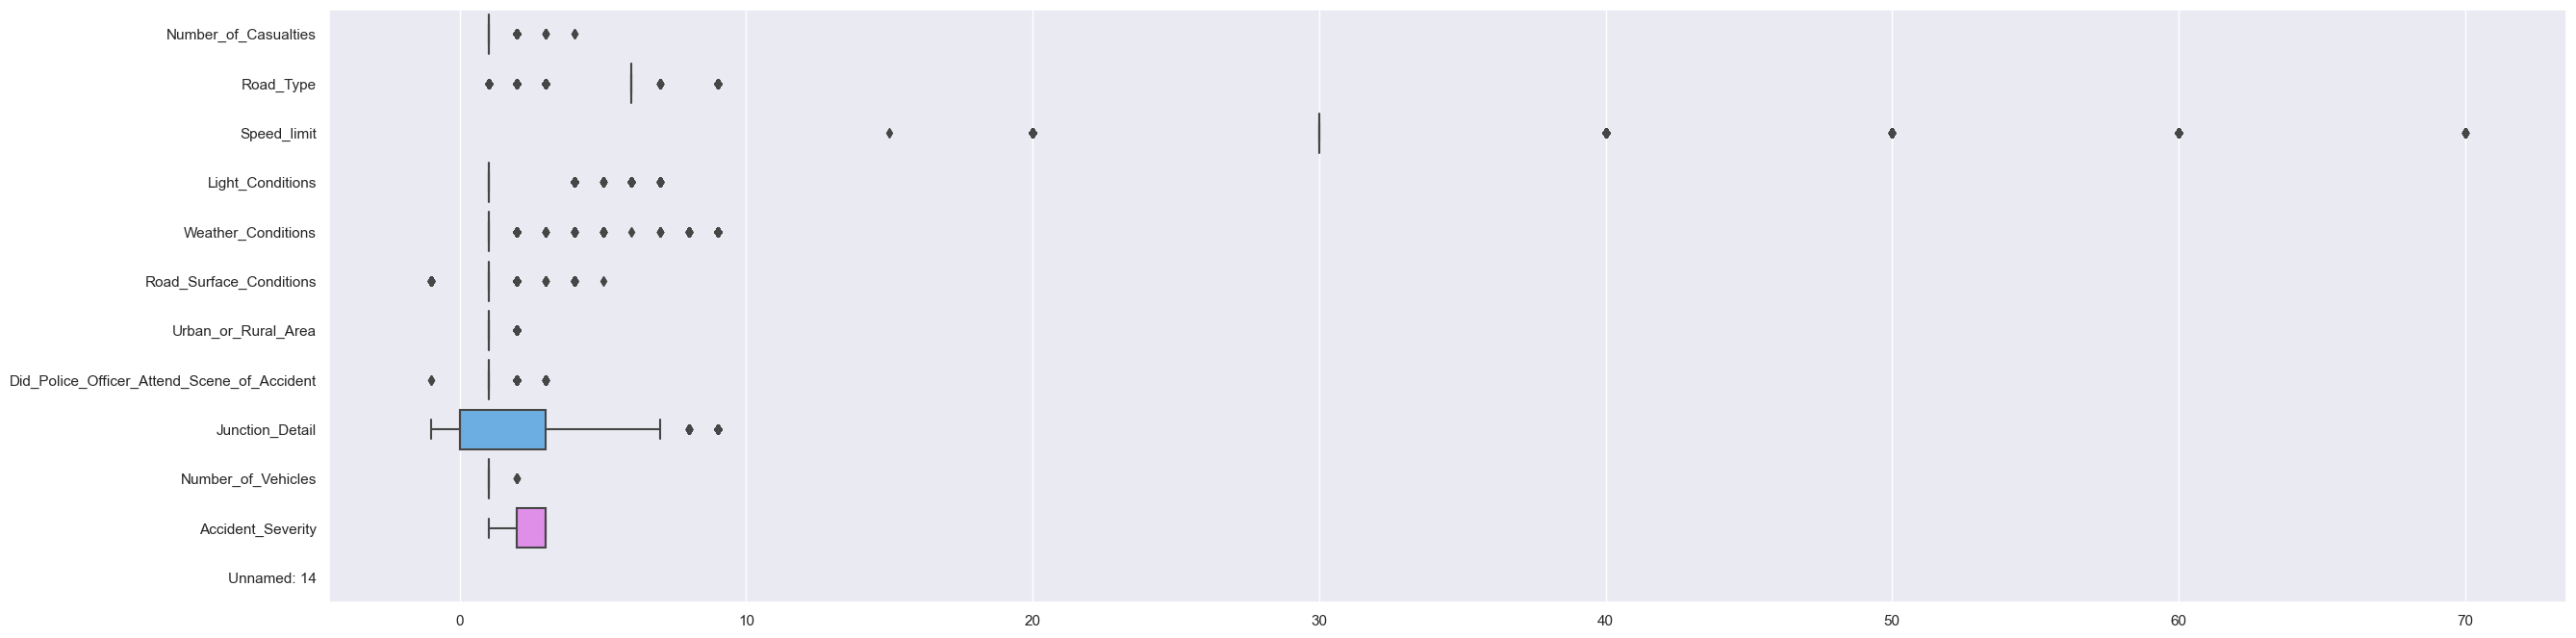

In [6]:
fig=plt.figure(figsize=(30,8))
ax = sns.boxplot(data=dt_biciAlpes, orient="h" )


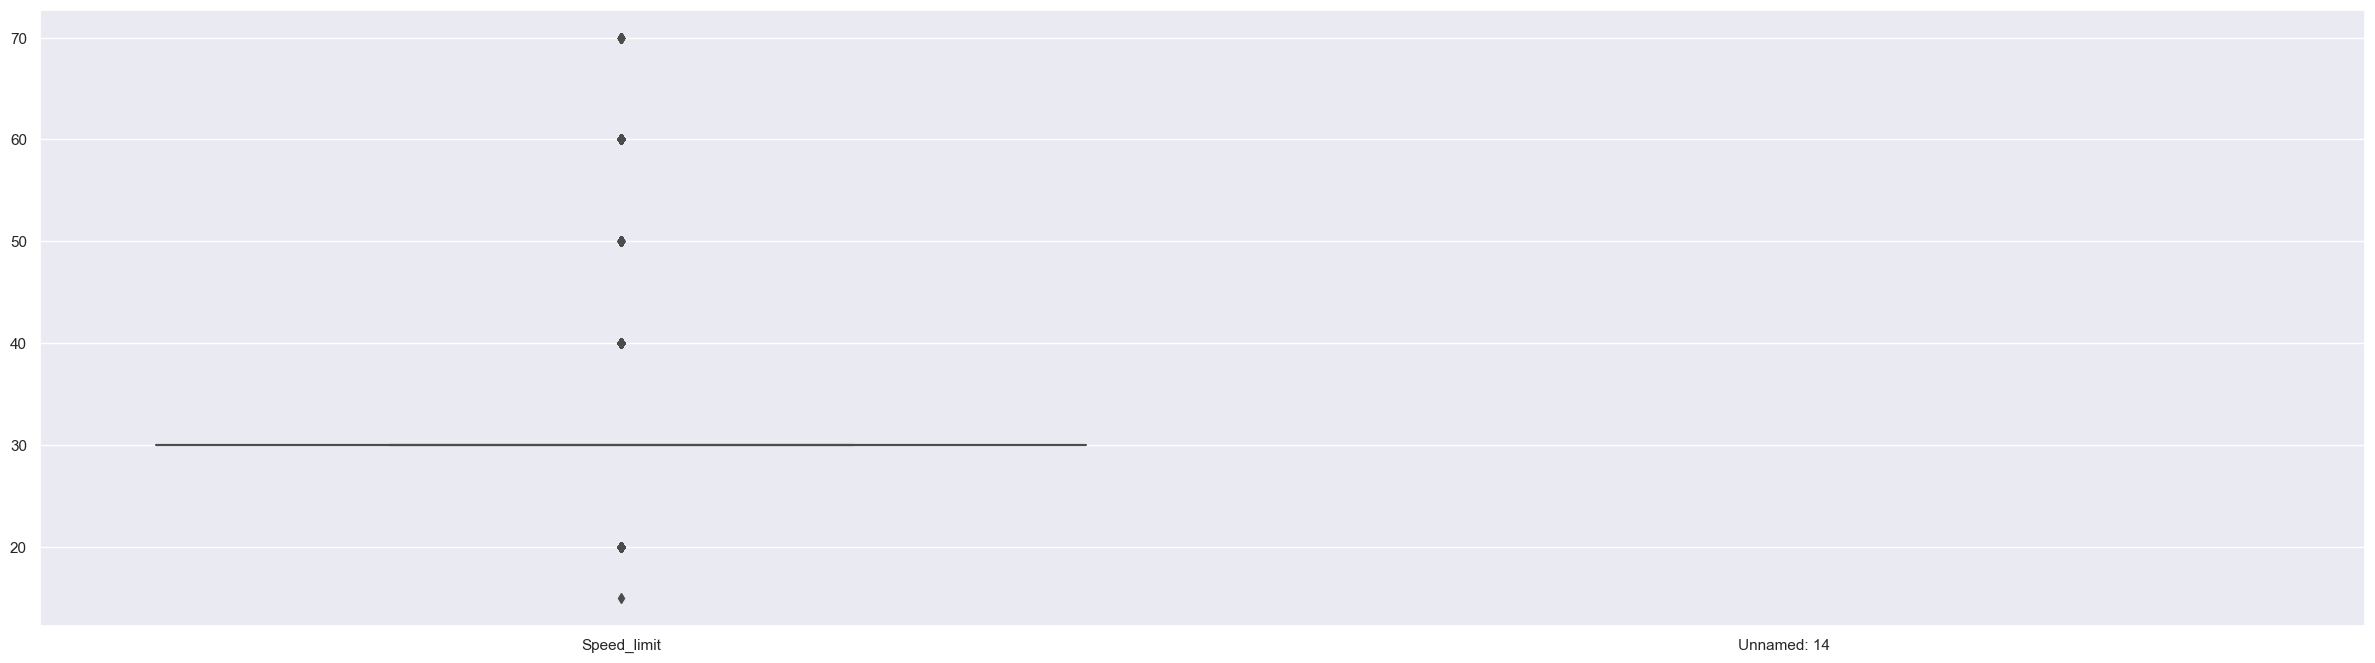

In [7]:
name_cols_float = dt_biciAlpes.select_dtypes(include = ['float']).columns
fig=plt.figure(figsize=(30,8))
ax = sns.boxplot(data=dt_biciAlpes[name_cols_float], orient="v")
#Se hace una revisión solo a los datos float

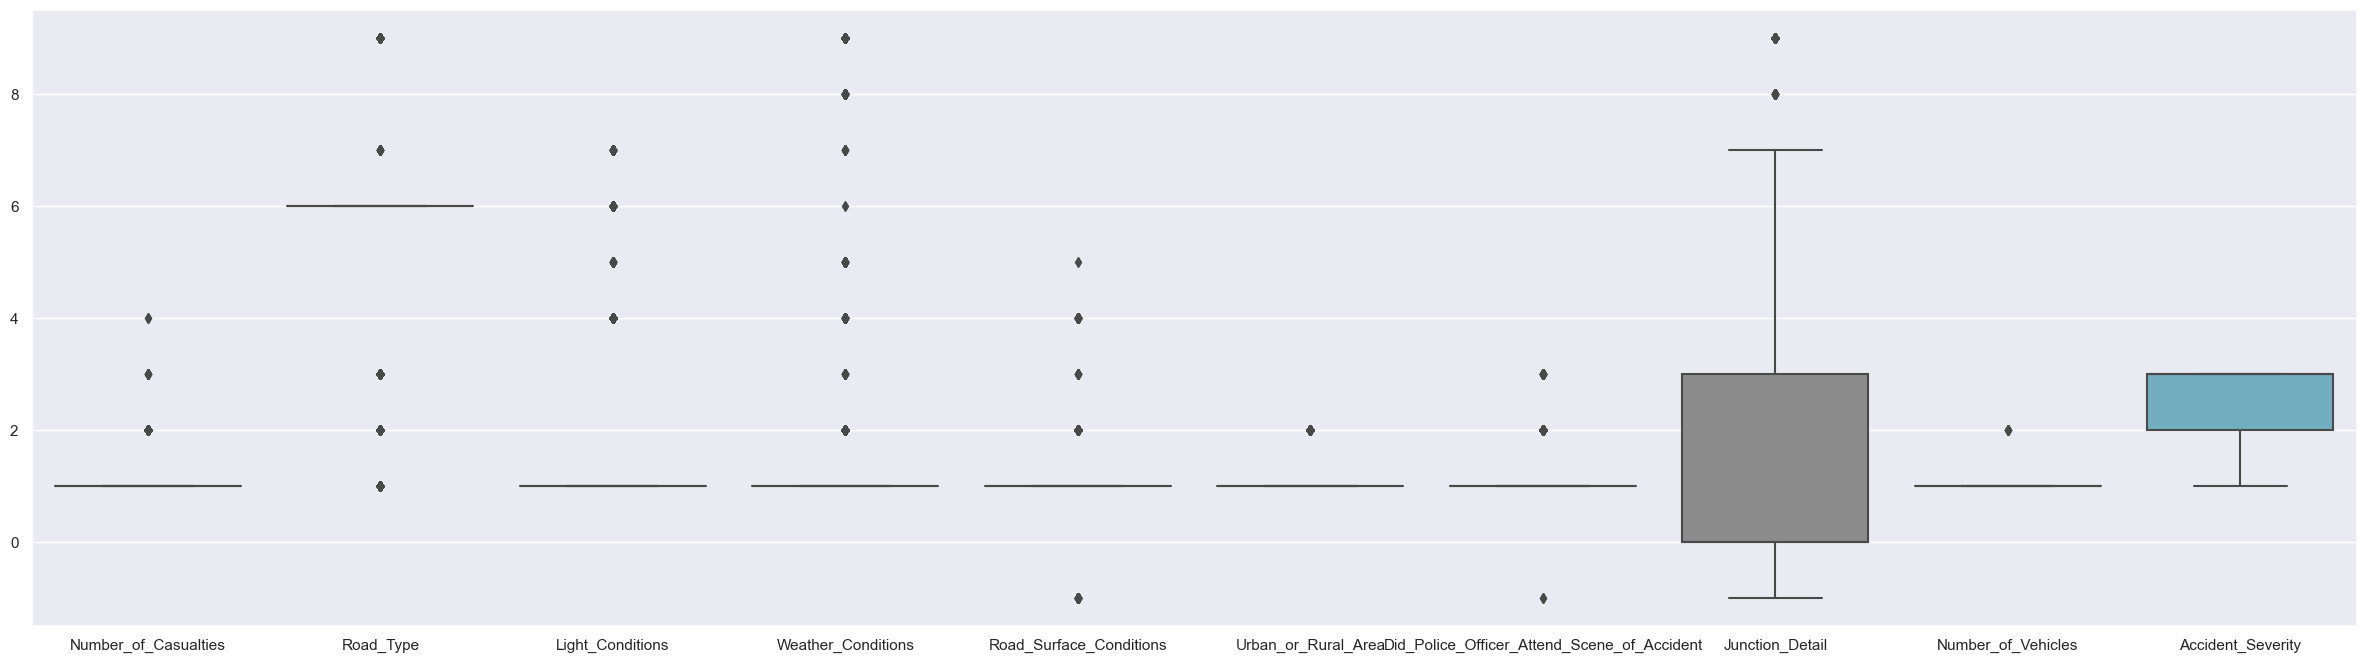

In [8]:
name_cols_int = dt_biciAlpes.select_dtypes(include = ['int64']).columns
fig=plt.figure(figsize=(30,8))
ax = sns.boxplot(data=dt_biciAlpes[name_cols_int], orient="v")
#Se hace una revisión solo a los datos int

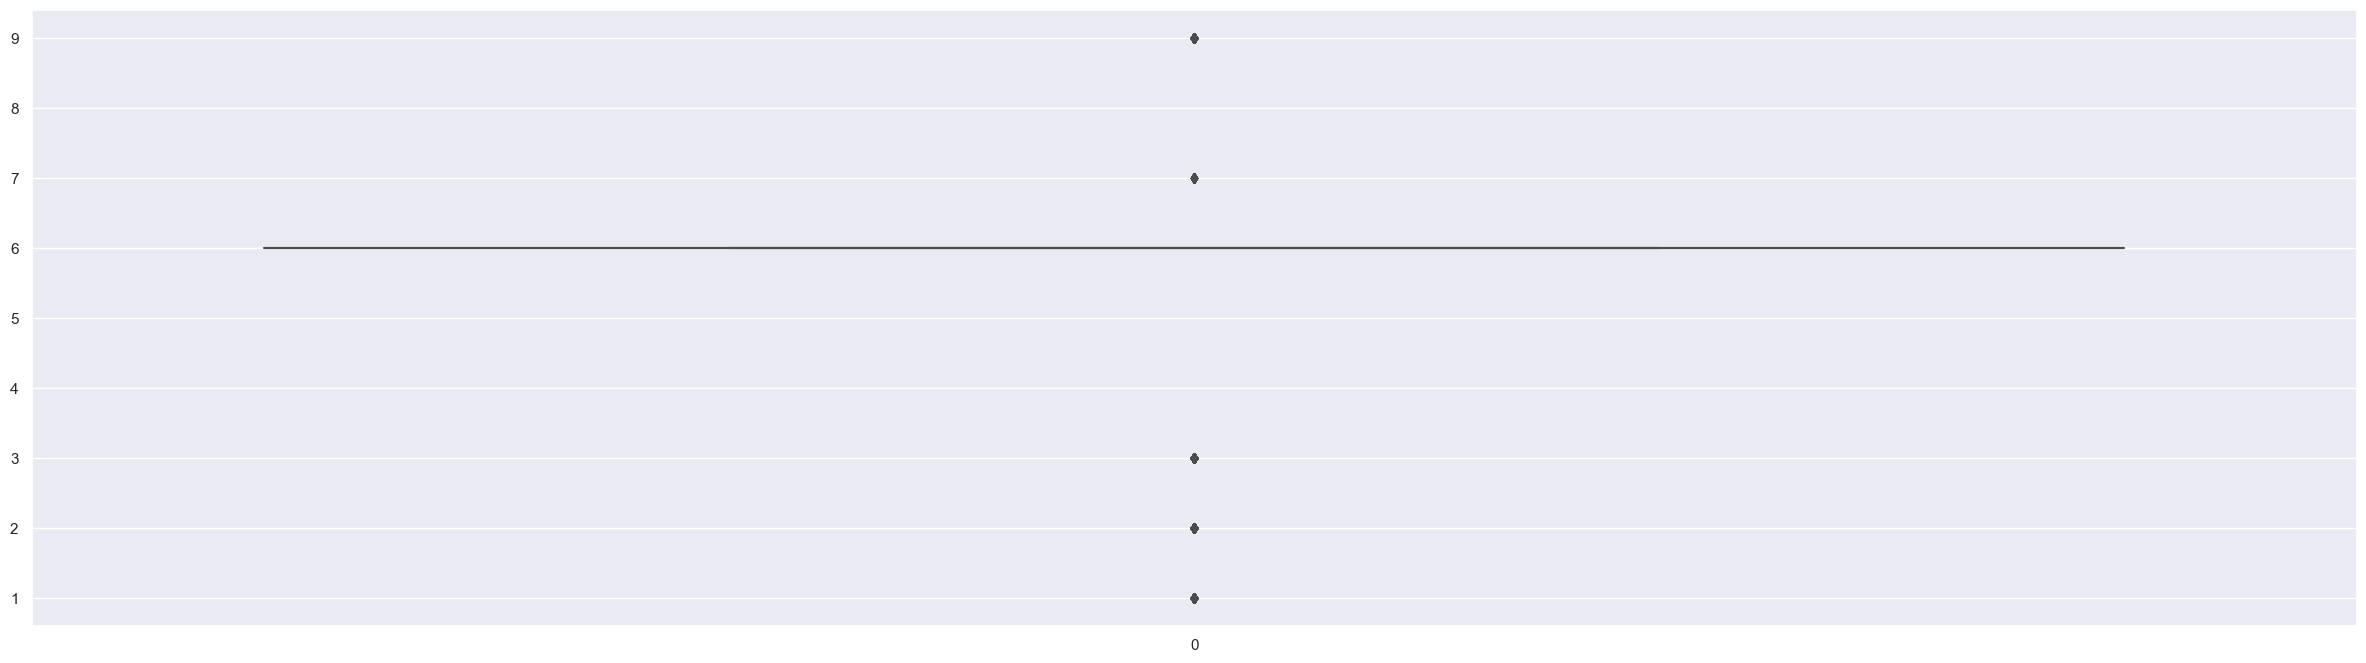

In [9]:
fig=plt.figure(figsize=(30,8))
ax = sns.boxplot(data=dt_biciAlpes["Road_Type"], orient="v")
#Se hace una revisión a los datos relacionados con road type-> casi todos los datos 
#categoricos se ven de esa manera 

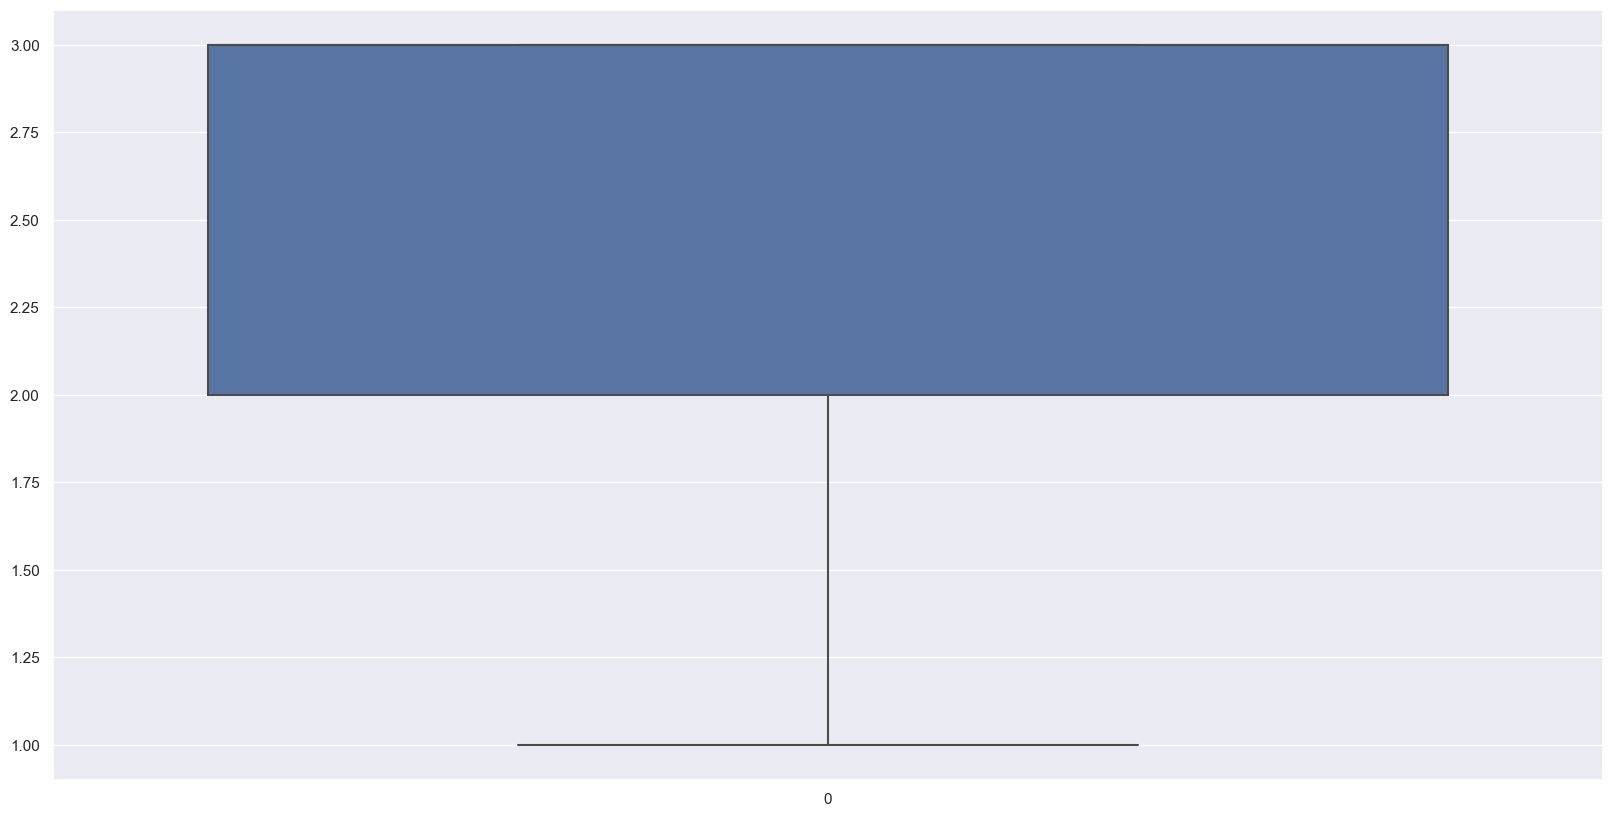

In [10]:
fig=plt.figure(figsize=(20,10))
ax = sns.boxplot(data=dt_biciAlpes["Accident_Severity"], orient="v")
# En general en base al boxplot se puede decir que los datos entran dentro de los rangos
# establecidos en el diccionario

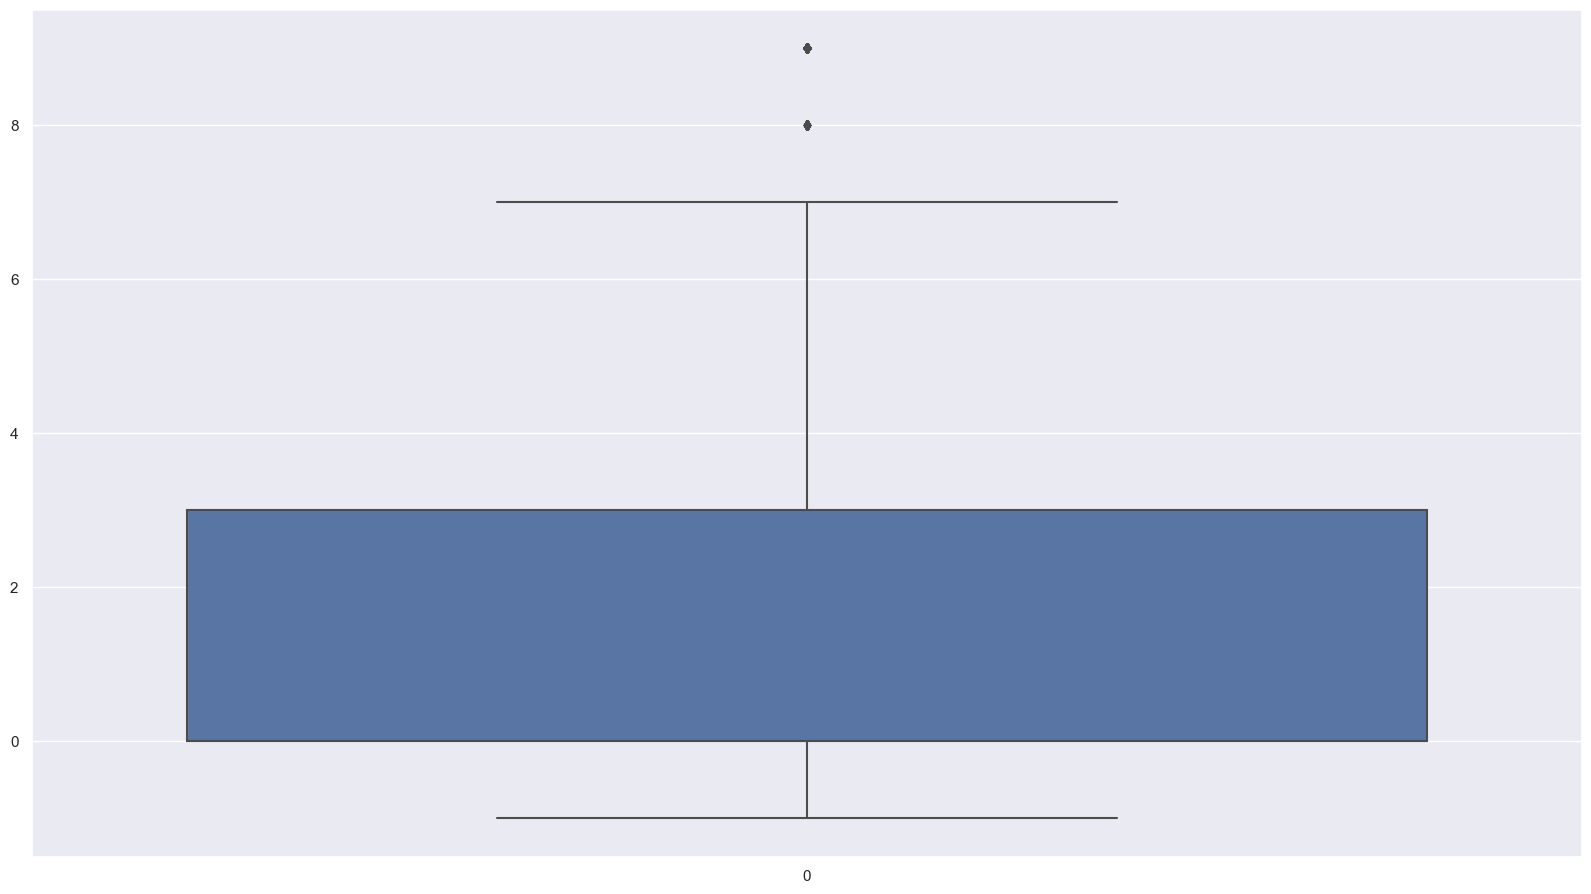

In [11]:
fig=plt.figure(figsize=(20,11))
ax = sns.boxplot(data=dt_biciAlpes["Junction_Detail"], orient="v")
# En general en base al boxplot se puede decir que los datos entran dentro de los rangos
# establecidos en el diccionario

In [12]:
name_cols_non_number = dt_biciAlpes.select_dtypes(include = ['object']).columns
dt_biciAlpes[name_cols_non_number].describe()
#Descripción de variables no numericas 
#se puede ver time, el día de la semana y tipo de vehiculo son NO numericas

,Time,Day_of_Week,Vehicle_Type
count,5338,5319,5338
unique,4,2,1
top,Tarde,Día laboral,bike
freq,2171,3832,5338


In [13]:
dt_biciAlpes[name_cols_non_number].sample(15)

,Time,Day_of_Week,Vehicle_Type
2695,Tarde,Día laboral,bike
1608,Tarde,Fin de semana,bike
3918,Mañana,Fin de semana,bike
4377,Tarde,Día laboral,bike
155,Noche,Día laboral,bike
2438,Noche,Día laboral,bike
2915,Mañana,Día laboral,bike
976,Mañana,Día laboral,bike
846,Tarde,Día laboral,bike
5332,Tarde,Fin de semana,bike


In [14]:
dt_biciAlpes['Vehicle_Type'].value_counts()
# con esto podemos ver que todos los datos hablan de bicicletas

bike    5338
Name: Vehicle_Type, dtype: int64

In [15]:
dt_biciAlpes['Accident_Severity'].value_counts()
# se puede ver que la severidad de los incidentes en su mayoría son de tipo 3= leve

3    3462
2    1781
1      95
Name: Accident_Severity, dtype: int64

In [16]:
dt_biciAlpes['Day_of_Week'].value_counts()
# se puede ver que los incidentes en su mayoría son día laboral

Día laboral      3832
Fin de semana    1487
Name: Day_of_Week, dtype: int64

In [17]:
dt_biciAlpes['Weather_Conditions'].value_counts()
# se puede ver que la mayoría de indicentes se da en días con vientos suaves 

1    4621
2     321
9     191
8      80
4      59
5      46
3      12
7       7
6       1
Name: Weather_Conditions, dtype: int64

In [18]:
dt_biciAlpes['Light_Conditions'].value_counts()
# se puede ver que la mayoría se da en luz diurna 

1    4231
4     891
6     122
7      73
5      21
Name: Light_Conditions, dtype: int64

In [19]:
dt_biciAlpes['Road_Surface_Conditions'].value_counts()
# se puede ver que la mayoría se da en vias secas.

 1    4260
 2     901
 4      87
-1      81
 3       8
 5       1
Name: Road_Surface_Conditions, dtype: int64

In [20]:
profile = pandas_profiling.ProfileReport(dt_biciAlpes)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
(dt_biciAlpes.isnull().sum() / dt_biciAlpes.shape[0]).sort_values(ascending = False)
#En general se evidencia que hay completitud de los datos a excepción de quellas columnas
#relacionadas con el día de la semana

Unnamed: 14                                    1.000000
Day_of_Week                                    0.003559
Time                                           0.000000
Number_of_Casualties                           0.000000
Road_Type                                      0.000000
Speed_limit                                    0.000000
Light_Conditions                               0.000000
Weather_Conditions                             0.000000
Road_Surface_Conditions                        0.000000
Urban_or_Rural_Area                            0.000000
Vehicle_Type                                   0.000000
Did_Police_Officer_Attend_Scene_of_Accident    0.000000
Junction_Detail                                0.000000
Number_of_Vehicles                             0.000000
Accident_Severity                              0.000000
dtype: float64

####  En si no es muy facil saber con facilidad si los datos están duplicados ya que no hay una columna que nos identifique la información

## 4. Iteración 1. Primer modelo

### 4.1 Identificación de variables a usar.
Para esta primera iteración se ha decidido usar.... 

In [22]:
# Exploraramos las variables que no son numéricas
name_cols_non_number = dt_biciAlpes.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['Time', 'Day_of_Week', 'Vehicle_Type'], dtype='object')

In [23]:
dt_biciAlpes.Day_of_Week.sample(15)

482     Fin de semana
4961      Día laboral
101               NaN
2281      Día laboral
4668      Día laboral
930       Día laboral
3629      Día laboral
4899      Día laboral
3393    Fin de semana
3460    Fin de semana
3567      Día laboral
2258      Día laboral
5236    Fin de semana
4354      Día laboral
3947      Día laboral
Name: Day_of_Week, dtype: object

In [24]:
#Revisamos columnas cond datos no númericos
dt_biciAlpes[name_cols_non_number].describe()

,Time,Day_of_Week,Vehicle_Type
count,5338,5319,5338
unique,4,2,1
top,Tarde,Día laboral,bike
freq,2171,3832,5338


In [25]:
#Consulta a estos datos para un mejor analisis
dt_biciAlpes[name_cols_non_number].sample(10)

,Time,Day_of_Week,Vehicle_Type
2528,Mañana,Día laboral,bike
2137,Mañana,Día laboral,bike
3504,Mañana,Fin de semana,bike
1337,Tarde,Día laboral,bike
1192,Tarde,Día laboral,bike
5333,Tarde,Día laboral,bike
2638,Tarde,Día laboral,bike
2105,Tarde,Día laboral,bike
2866,Noche,Día laboral,bike
4481,Noche,Fin de semana,bike


In [71]:
name_cols_number = ['Road_Surface_Conditions','Accident_Severity']

In [72]:
dt_biciAlpes_prep = dt_biciAlpes.fillna(-99)

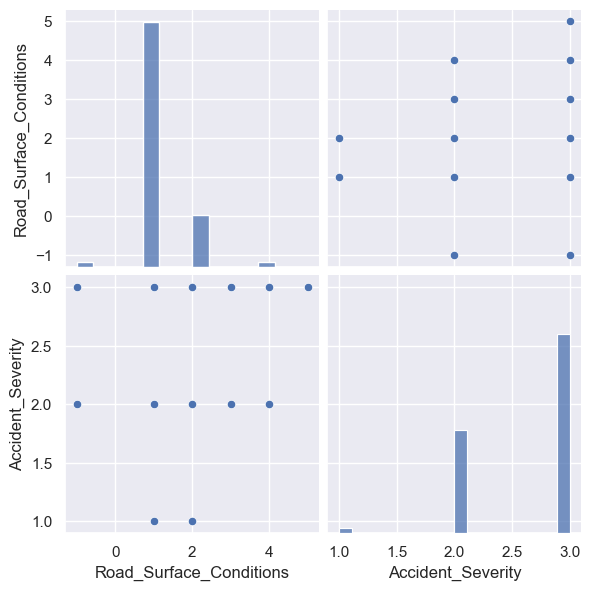

In [73]:
sns.pairplot(dt_biciAlpes_prep.dropna(), height=3,vars=['Road_Surface_Conditions','Accident_Severity'],kind='scatter')

In [78]:
biciAlpes_transform_new = dt_biciAlpes[name_cols_number].copy()

In [80]:
biciAlpes_transform_new.describe()

,Road_Surface_Conditions,Accident_Severity
count,5338.000000,5338.000000
mean,1.191083,2.630761
std,0.590522,0.518214
min,-1.000000,1.000000
25%,1.000000,2.000000
50%,1.000000,3.000000
75%,1.000000,3.000000
max,5.000000,3.000000


In [84]:
biciAlpes_transform_new = biciAlpes_transform_new.dropna(subset = name_cols_number)

In [85]:
biciAlpes_transform_new = pd.get_dummies(biciAlpes_transform_new,columns=["Road_Surface_Conditions"])

In [86]:
biciAlpes_transform_new.sample(5)

,Accident_Severity,Road_Surface_Conditions_-1,Road_Surface_Conditions_1,Road_Surface_Conditions_2,Road_Surface_Conditions_3,Road_Surface_Conditions_4,Road_Surface_Conditions_5
643,3,0,1,0,0,0,0
2505,2,0,1,0,0,0,0
86,2,0,0,1,0,0,0
4877,2,0,1,0,0,0,0
3708,3,0,1,0,0,0,0


In [87]:
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans = kmeans.fit(biciAlpes_transform_new)

In [88]:
#Transformar arreglo a un  dataframe(matriz) para utilizar en funciones más adelante
cols_number = biciAlpes_transform_new.to_numpy()

In [89]:
kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1])

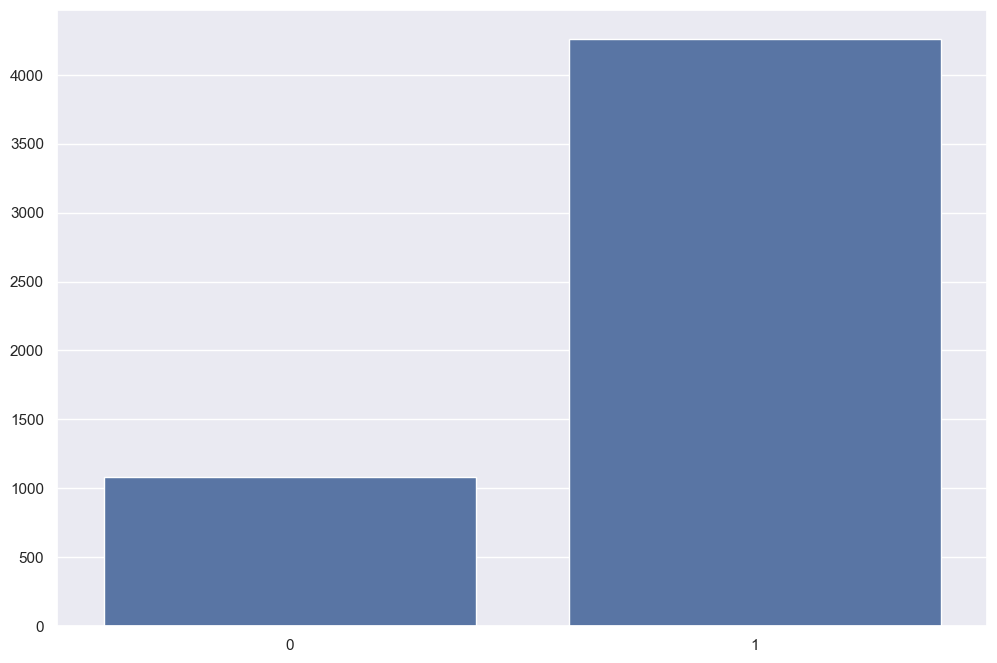

In [90]:
# Revisar la cantidad de registros en los clústeres resultado
labels = kmeans.labels_
biciAlpes_transform_new['Cluster'] = labels

cluster_distrib = biciAlpes_transform_new['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');

In [91]:
# Revisar de elementos por clúster y las variables utilizadas.
biciAlpes_transform_new.groupby('Cluster').count()

,Accident_Severity,Road_Surface_Conditions_-1,Road_Surface_Conditions_1,Road_Surface_Conditions_2,Road_Surface_Conditions_3,Road_Surface_Conditions_4,Road_Surface_Conditions_5
Cluster,,,,,,,
0,1078,1078,1078,1078,1078,1078,1078
1,4260,4260,4260,4260,4260,4260,4260


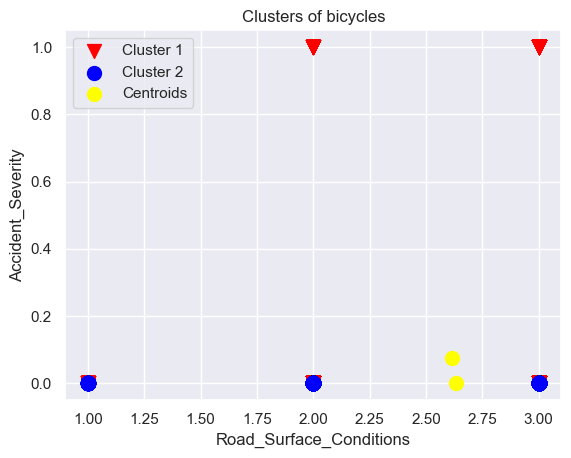

In [92]:
plt.scatter(cols_number[kmeans.labels_ == 0, 0], cols_number[kmeans.labels_ == 0, 1], s = 100, marker='v', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[kmeans.labels_ == 1, 0], cols_number[kmeans.labels_ == 1, 1], s = 100, marker='o', c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of bicycles')
plt.xlabel(name_cols_number[0])
plt.ylabel(name_cols_number[1])
plt.legend()
plt.show()

In [93]:
# Valores de los centroides de los clústeres generados
print('Centroides: [[',name_cols_number[0], ' ' , name_cols_number[1], ']]', kmeans.cluster_centers_)

Centroides: [[ Road_Surface_Conditions   Accident_Severity ]] [[ 2.61317254e+00  7.51391466e-02  1.11022302e-16  8.35807050e-01
   7.42115028e-03  8.07050093e-02  9.27643785e-04]
 [ 2.63521127e+00 -8.67361738e-18  1.00000000e+00  7.49400542e-16
  -1.71303943e-17 -7.28583860e-17 -2.14129929e-18]]


In [97]:
#TODO: Aplicar métodos para normalizar y estandarizar los datos, uno a la vez y concluir

mms = MinMaxScaler()
df_biciAlpes_prep_norm = mms.fit_transform(biciAlpes_transform_new.copy())
saved_cols = biciAlpes_transform_new.columns

df_biciAlpes_prep_norm = pd.DataFrame(df_biciAlpes_prep_norm, columns =saved_cols)

In [98]:
# Mirar  los estadísticos y revisar el resultado de la normalización
df_biciAlpes_prep_norm.describe()

,Accident_Severity,Road_Surface_Conditions_-1,Road_Surface_Conditions_1,Road_Surface_Conditions_2,Road_Surface_Conditions_3,Road_Surface_Conditions_4,Road_Surface_Conditions_5,Cluster
count,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000
mean,0.815380,0.015174,0.798052,0.168790,0.001499,0.016298,0.000187,0.798052
std,0.259107,0.122257,0.401491,0.374601,0.038688,0.126632,0.013687,0.401491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
def plot_distortion(data,
                    k_min=1, 
                    k_max=3,
                    ylabel = 'Distortion',
                    xlabel = 'Number of clusters',
                    title = 'Distortion Plot'):
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


In [ ]:
plot_distortion(df_tracks_prep_norm,1,11)

In [ ]:
N_clusters=2
kmeans2 = KMeans(n_clusters=N_clusters, random_state=0) 
kmeans2 = kmeans2.fit(df_tracks_prep_norm)

In [ ]:
# Revisar la cantidad de registros en los clústeres resultado
labels = kmeans.labels_
df_tracks_prep_norm['Cluster'] = labels

cluster_distrib = df_tracks_prep_norm['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');